# Clustering using K-Means, Hierarchical Clustering and DBSCAN

# Introduction
The dataset used in this notebook contains 5 features or columns, viz. 'Age', 'Annual Income', 'Spending Score' and 'Gender'. The data seems to be gathered for regular customers in a mall and based on their spending, the customers are assigned a Spending Score. <br>

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>2 |</b> Basic Libraries and File Imports</p></div>
<a id="2"></a>

In [ ]:
# for mathematical operations
import numpy as np
import pandas as pd
import matplotlib
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Check available files in the dataset.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mall-customerscsv/Mall_Customers.csv


Create dataframe for the data.

In [ ]:
df = pd.read_csv("/kaggle/input/mall-customerscsv/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>3 |</b> Exploratory Data Analysis</p></div>
<a id="3"></a>

Check if the data has any missing value(s).

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Get a basic statistical summary of the data.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check number of Males and Females in the Gender column.

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

We have a feature 'CustomerID' which is unique to each customer and is of no use in analysis and model building. Let's go ahead and drop the feature.

In [ ]:
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


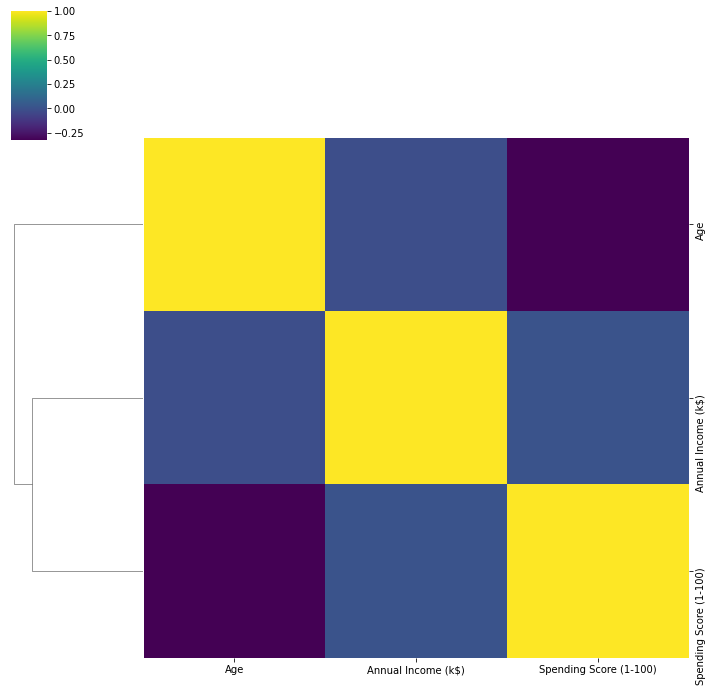

In [ ]:
sns.clustermap(df.corr(), cmap='viridis', col_cluster=False);

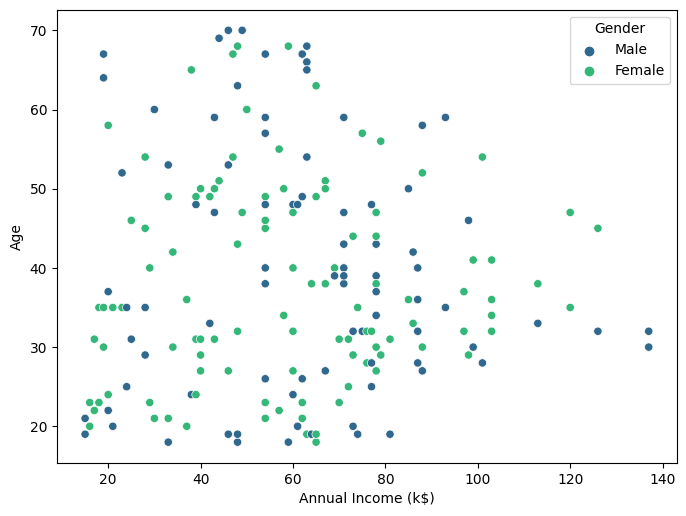

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender', palette='viridis');

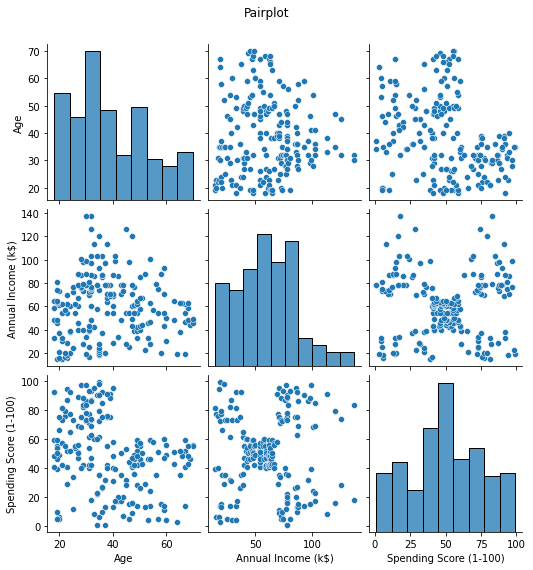

In [ ]:
sns.pairplot(df);
plt.suptitle('Pairplot', y=1.05);

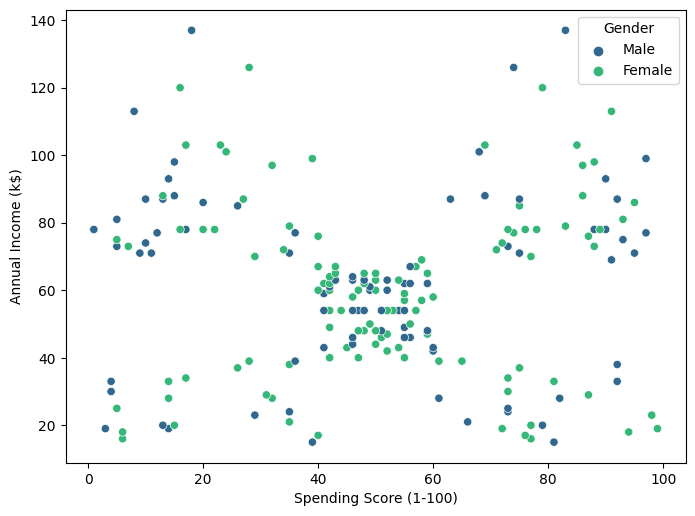

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', palette='viridis');

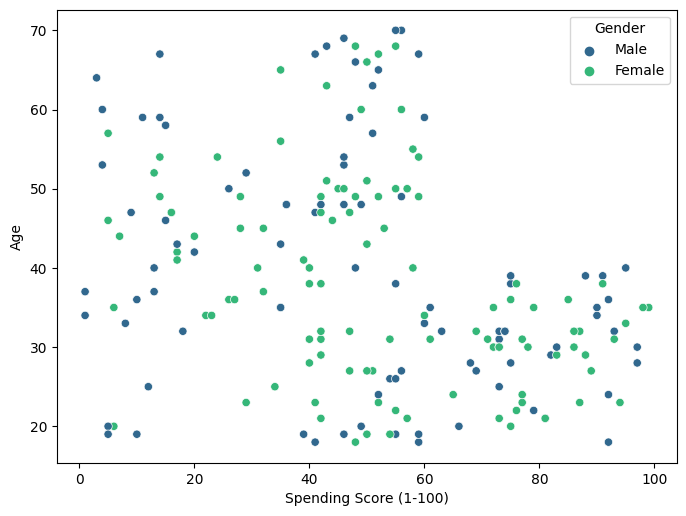

In [ ]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender', palette='viridis');

Let's visualize the distribution of 'Age', 'Annual Income (k$) and 'Spending Score' (1-100).

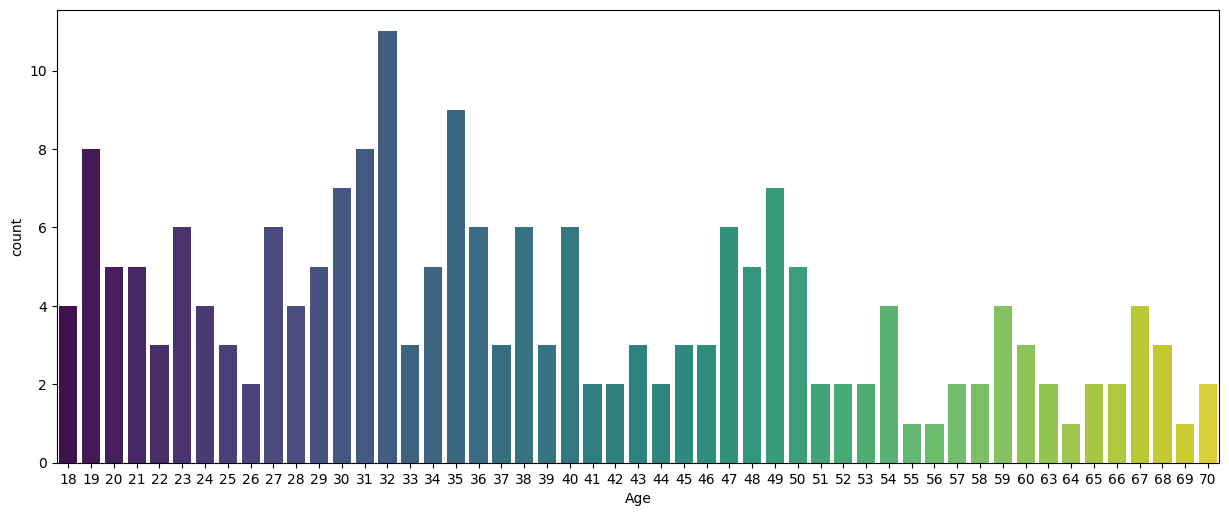

In [ ]:
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df, x='Age', palette='viridis');

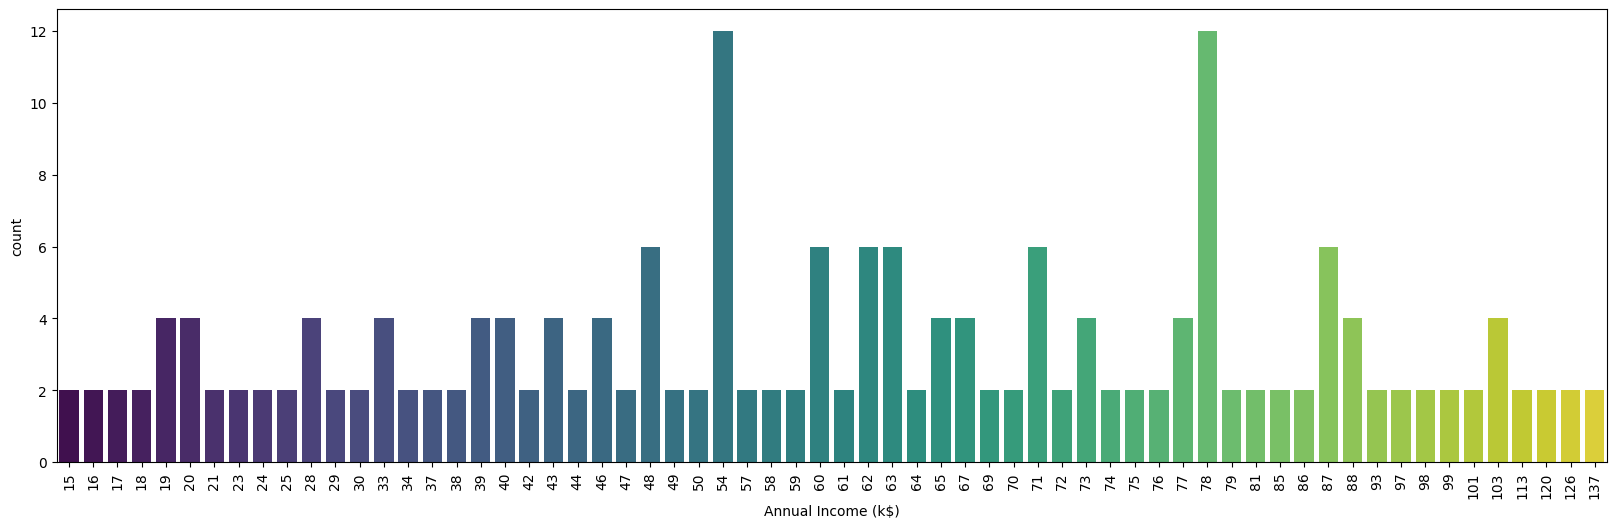

In [ ]:
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Annual Income (k$)', palette='viridis');
plt.xticks(rotation=90);

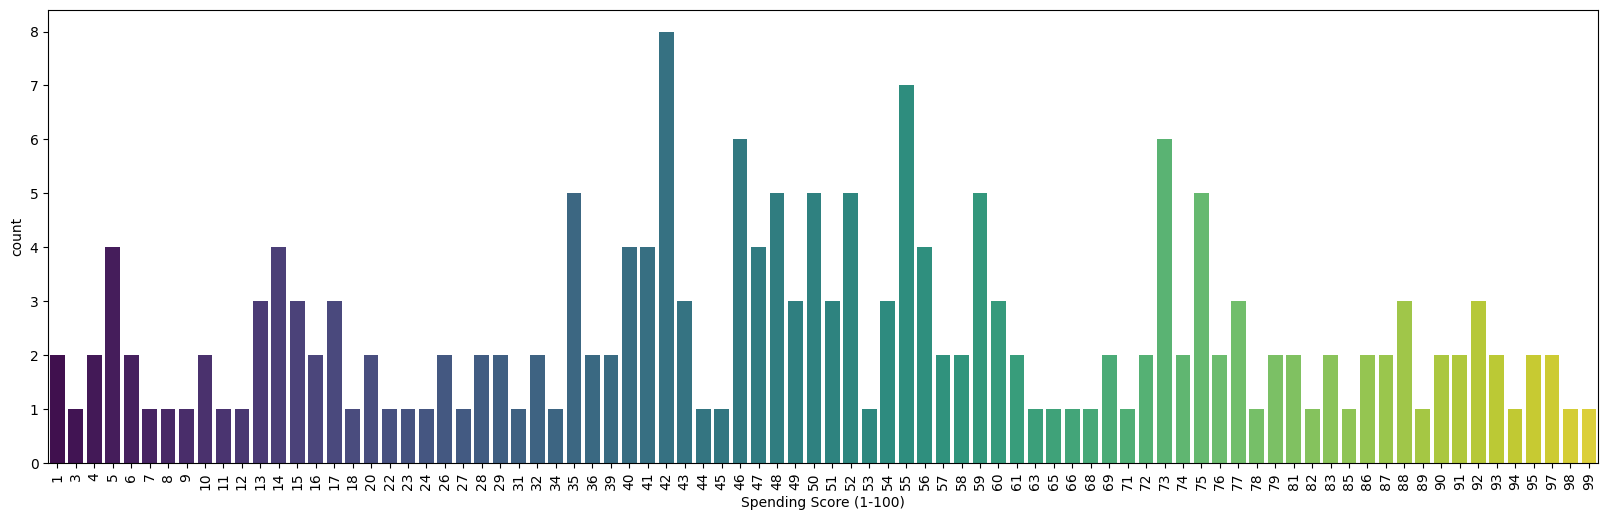

In [ ]:
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Spending Score (1-100)', palette='viridis');
plt.xticks(rotation=90);

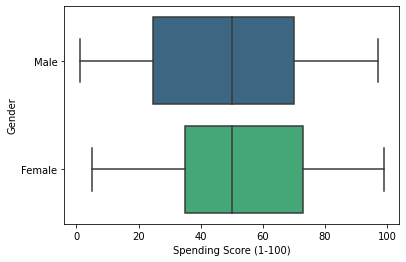

In [ ]:
sns.boxplot(data=df, y='Gender', x='Spending Score (1-100)', palette='viridis');

In [ ]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


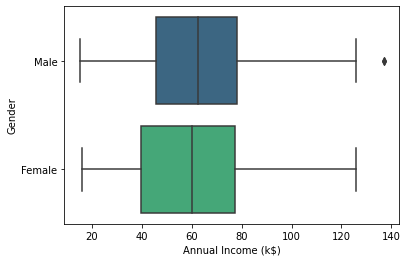

In [ ]:
sns.boxplot(data=df, y='Gender', x='Annual Income (k$)', palette='viridis');

In [ ]:
df.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


The mean annual income of males is a tad bit higher although the overall distribution is very similar.

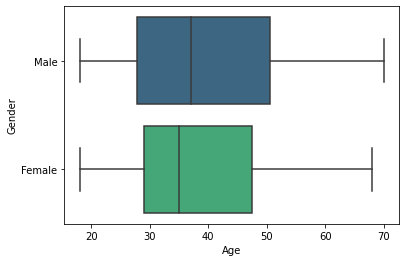

In [ ]:
sns.boxplot(data=df, y='Gender', x='Age', palette='viridis');

In [ ]:
df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


 4.1 Creating Dummies

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


 scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>5 |</b> Creating Models</p></div>
<a id="5"></a>

 5.1 K Means


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    ssd.append(model.inertia_)
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

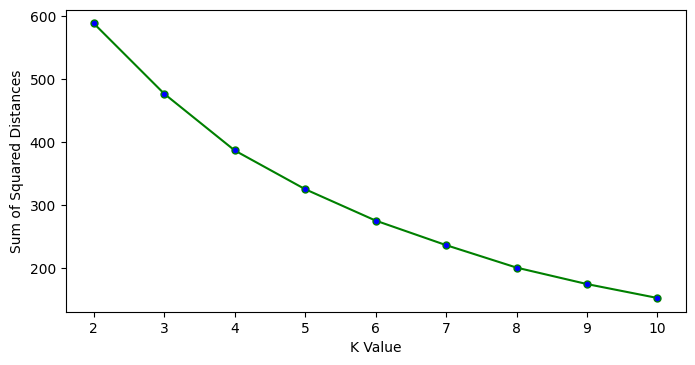

In [ ]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");

In [ ]:
model = KMeans(n_clusters=5)
model.fit(scaled_df)

KMeans(n_clusters=5)

In [ ]:
k_means_labels = model.fit_predict(df)
k_means_labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

 5.2 Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [2]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) # each point starts as its own cluster
# From sklearn documentation:
# distance_thresholdfloat, default=None
# The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.

NameError: ignored